## Graded Project

**Machine Learning - Unsupervised Learning**

##### **Domain:
    
##### ○ E-commerce**

##### Business Context:

● Customer segmentation is one of the most important marketing tools at your
disposal, because it can help a business to better understand its target audience.This is because it groups customers based on common characteristics.

● Segmentation can be based on the customer’s habits and lifestyle, in
particular, their buying habits. Different age groups, for example, tend to
spend their money in different ways, so brands need to be aware of who
exactly is buying their product.

● Segmentation also focuses more on the personality of the consumer,
including their opinions, interests, reviews, and rating. Breaking down a
large customer base into more manageable clusters, making it easier to
identify your target audience and launch campaigns and promote the
business to the most relevant people 


### Dataset Description:


The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)

### Attribute Information:

SL.No Attribute Description
1. user_id       a unique id for the customer
2. item_id       unique product id
3. weight        weight measurement of customer
4. rented for    purpose clothing was rented for
5. body type     body type of customer
6. review_text   review given by the customer
7. size          the standardized size of the product
8. rating        rating for the product
9. age           age of the customer
10. category     the category of the product
11. bust size    bust measurement of customer
12. height       height of the customer
13. review_date  date when the review was written
14. fit          fit feedback


## ● Import the required libraries and load the data: [ Score: 3 point ]

### 1. Load the required libraries and read the dataset. (1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from scipy.spatial import distance
from scipy.cluster.hierarchy import fcluster

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('renttherunway.csv')

In [3]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features (2)

In [4]:
df.sample(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
78933,78933,large,764484,34b,1953205,150lbs,10.0,formal affair,"Beautiful dress, especially the back. Slightly...",athletic,Totally stood out in this dress! No one else h...,gown,"5' 9""",8,22.0,"May 28, 2017"
9727,9727,fit,372373,32b,145906,108lbs,10.0,formal affair,I loved the color of this dress!! the only thi...,petite,great color! i got so many compliments :),gown,"5' 2""",0,22.0,"April 8, 2014"
190340,190340,fit,365570,32d,1788819,135lbs,10.0,party,I wore this to a summer rehearsal dinner befor...,athletic,Lovely summer dress,maxi,"5' 8""",8,34.0,"August 3, 2017"
108025,108025,fit,924080,34d,1882156,115lbs,10.0,formal affair,This dress is beautiful in person. It was com...,petite,Gorgeous!,gown,"5' 2""",4,52.0,"March 9, 2016"
34686,34686,fit,173447,36b,166006,136lbs,10.0,formal affair,The 4 was too tight. 6 fit perfect and my shoe...,athletic,It was so easy!\n,gown,"5' 5""",12,46.0,"December 21, 2014"


In [5]:
df.shape

(192544, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [7]:
df.ndim

2

In [8]:
df[['item_id','rating','size','age']].describe()

,item_id,rating,size,age
count,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,1.045684e+06,9.092371,12.245175,33.871017
std,8.053148e+05,1.430044,8.494877,8.058083
min,1.233730e+05,2.000000,0.000000,0.000000
25%,1.950760e+05,8.000000,8.000000,29.000000
50%,9.483960e+05,10.000000,12.000000,32.000000
75%,1.678888e+06,10.000000,16.000000,37.000000
max,2.966087e+06,10.000000,58.000000,117.000000


In [9]:
## Checking the Percentage of null values in a specific column of the dataset
df.isnull().sum()/len(df) * 100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.035317
body type          7.601899
review_summary     0.180219
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

### ● Data cleansing and Exploratory data analysis: [ Score: 20 point ]

### 3. Check if there are any duplicate records in the dataset? If any, drop them.(1)

In [10]:
df[df.duplicated()]

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
len(df[df.duplicated()])

0

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)

In [13]:
coloums_to_drop = ['Unnamed: 0','user_id','item_id','review_text','review_date','review_summary']

In [14]:
df.drop(columns = coloums_to_drop,inplace=True)

In [15]:
df.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0


In [16]:
df.shape

(192544, 10)

### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)


In [17]:
# Check for string data in the 'weight' column and convert to float
df['weight'] = df['weight'].apply(lambda x : float(x.replace('lbs','')) if isinstance(x,str) else x)

# Check the data types after conversion
print(df.dtypes)

# If needed, convert the column type explicitly to float
df['weight'] = df['weight'].astype(float)

fit            object
bust size      object
weight        float64
rating        float64
rented for     object
body type      object
category       object
height         object
size            int64
age           float64
dtype: object


In [18]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (2)

In [19]:
# Check unique categories in the 'rented for' column
unique_categories = df['rented for'].unique()

# Display unique categories before grouping
print("Unique categories before grouping:")
print(unique_categories)

Unique categories before grouping:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']


In [20]:
# Group 'party: cocktail' category with 'party'
df['rented for'].replace('party: cocktail' , 'party',inplace=True)

In [21]:
# Verify the changes by checking unique categories again
unique_categories_updated = df['rented for'].unique()
print(unique_categories_updated)

['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan]


### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)

In [22]:
def convert_to_inches(height):
    if isinstance(height,str):
        feet, inches = map(int, height.replace('"', '').split("' "))
        return(feet * 12) + inches
    return height
   
# Applying the conversion function to the 'height' column
df['height'] = df['height'].apply(convert_to_inches)

# Display the updated DataFrame
df.head()


,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,64.0,4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)


In [23]:
df[df == '?']=np.nan

## Now filling "NAN" with the most frequent value- the mode.
for col in ['bust size', 'weight','rating','rented for','body type','category','height','age']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
print("The missing value of each columns of the dataframe \n",(df.isnull().sum()))

The missing value of each columns of the dataframe 
 fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  object 
 5   body type   192544 non-null  object 
 6   category    192544 non-null  object 
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


### 9. Check the statistical summary for the numerical and categorical columns and write your findings. (3)

In [25]:
print("Statistical Summary for Numerical Columns:")
df.describe()

Statistical Summary for Numerical Columns:


,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,136.240709,9.092758,65.306013,12.245175,33.856703
std,20.300468,1.429862,2.659925,8.494877,8.040513
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,130.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


In [26]:
print("Statistical Summary for Categorical Columns:")
df.describe(include='object')

Statistical Summary for Categorical Columns:


,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


From the above statistical summary we can derive the following -

Weight: The average weight is approximately 137 lbs, with a standard deviation of around 20 lbs. The minimum weight is 50 lbs and the maximum is 300 lbs. The 25th, 50th (median), and 75th percentiles are 125 lbs, 135 lbs, and 145 lbs respectively.

Rating: The average rating is approximately 9.09, with a standard deviation of around 1.43. The minimum rating is 2 and the maximum is 10. The median rating is 10, which indicates that at least half of the ratings are perfect scores.

Height: The average height is approximately 65.31 inches (or about 5’5"), with a standard deviation of around 2.66 inches. The minimum height is 54 inches (4’6") and the maximum is 78 inches (6’6"). The median height is 65 inches (5’5").

Size: The average size is approximately 12.24, with a standard deviation of around 8.49. The minimum size is 0 and the maximum is 58. The median size is 12.

Age: The average age is approximately 33.86 years, with a standard deviation of around 8.04 years. The minimum age is listed as 0, which might indicate some missing values/wrong data. The maximum age is 117 years, which could also be an outlier or error. The median age is 32 years.

### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)


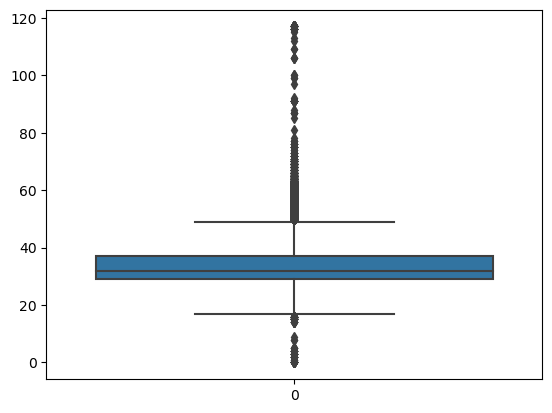

In [27]:
sns.boxplot(df['age'])
plt.show()

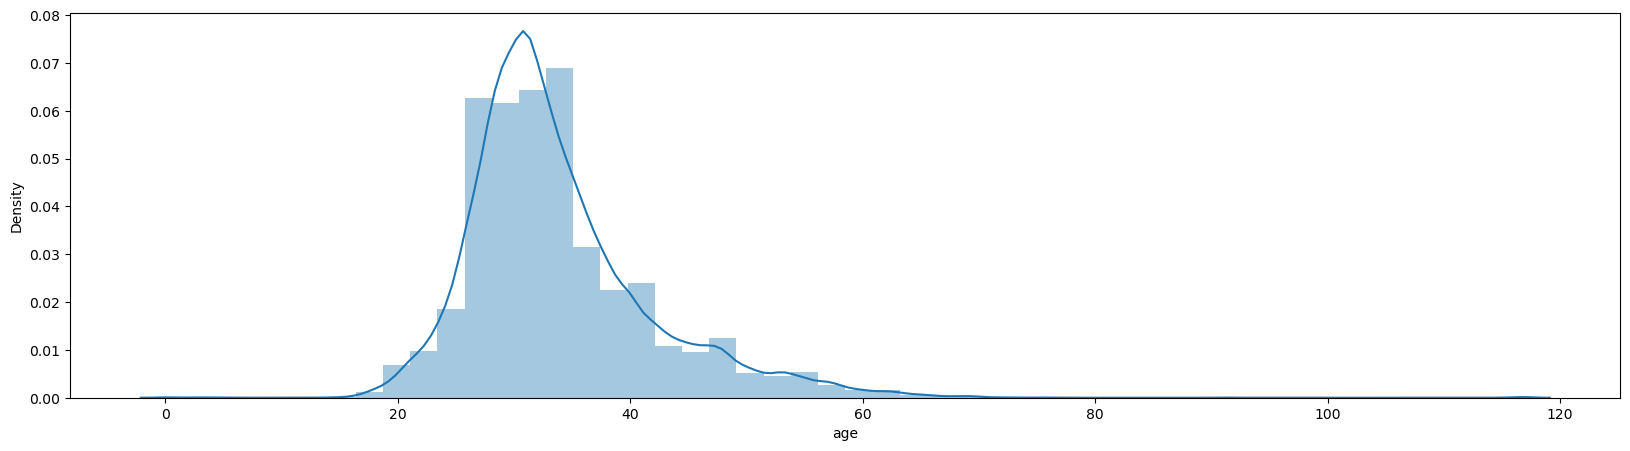

In [28]:
plt.figure(figsize=[20,5])
sns.distplot(df['age'])
plt.show()

**.** The data is skewed to the right, indicating outliers.

In [29]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

print('Quartile 1 = ', Q1)
print('Quartile 3 = ', Q3)
print('Inter Quartile Range = ', IQR)

Quartile 1 =  29.0
Quartile 3 =  37.0
Inter Quartile Range =  8.0


In [30]:
lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)

print('Lower Whisker = ', lower_whisker)
print('Upper Whisker = ' , upper_whisker)

Lower Whisker =  17.0
Upper Whisker =  49.0


In [32]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,34b,130.0,10.0,party,hourglass,sheath,64.0,4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


**.** From the box-plot, it is evident that there are a lot of outliers available for the column 'age'.

**.** So using the IQR treatment, the outliers are removed and minimised. The results of the same can be observed in the after treatment box-plot.

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

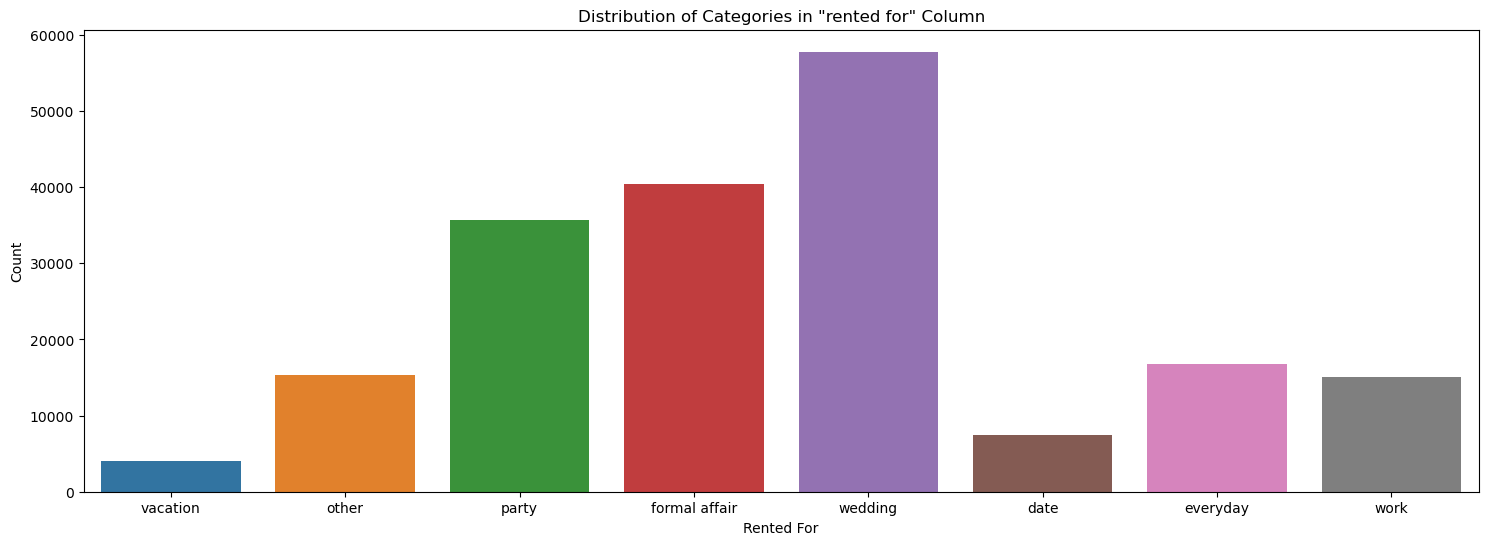

In [33]:
# Plotting the distribution of 'rented for' categories
plt.figure(figsize=(18,6))
sns.countplot(data = df, x= 'rented for')
plt.title('Distribution of Categories in "rented for" Column')
plt.xlabel('Rented For')
plt.ylabel('Count')
plt.show()

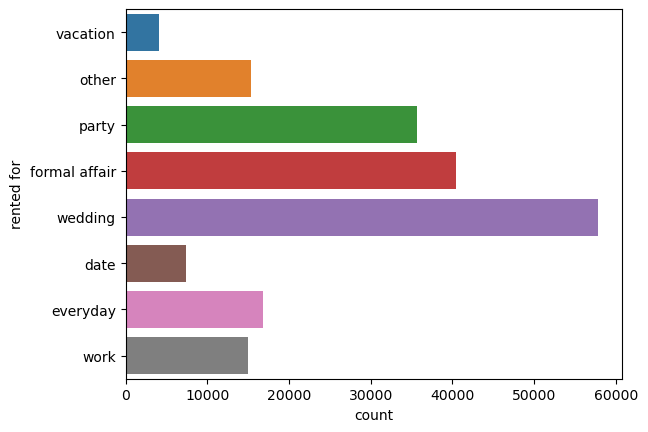

In [34]:
## let us check the distribution of the column rented for
sns.countplot(y = df['rented for'])
plt.show()

In [35]:
## Let us make a copy of the cleaned dataset before encoding and standardizing the columns
dfc1 = df.copy()

## ● Data Preparation for model building: [ Score: 2 point ]

### 12. Encode the categorical variables in the dataset. (1)

In [36]:
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [37]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,130.0,10.0,4,3,45,64.0,4,116.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0


### 13. Standardize the data, so that the values are within a particular range. (1)

In [38]:
## Tranforming the data using minmax scaling approach so that the values range will be 1.

mm = MinMaxScaler()

df.iloc[:,:] = mm.fit_transform(df.iloc[:,:])
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0.0,0.371429,0.348,1.00,0.714286,0.500000,0.656716,0.583333,0.241379,0.239316
1,0.0,0.352381,0.328,1.00,0.428571,1.000000,0.298507,0.500000,0.206897,0.307692
2,0.0,0.352381,0.320,1.00,0.571429,0.500000,0.671642,0.416667,0.068966,0.991453
3,0.0,0.361905,0.340,0.75,0.285714,0.666667,0.238806,0.458333,0.137931,0.290598
4,0.0,0.352381,0.380,1.00,0.857143,0.166667,0.298507,0.625000,0.206897,0.230769


In [39]:
## Let us make a copy of the cleaned dataset after encoding and standardizing the columns.
dfc2 = df.copy()

## ● Principal Component Analysis and Clustering: [ Score: 23 point ]

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. (7)

In [40]:
## step1: Calculate the covariance matrix.
cov_matrix = np.cov(df.T)
cov_matrix

array([[ 1.26744543e-01,  3.36336858e-04,  4.08307311e-04,
        -1.55923580e-02,  8.74948022e-04, -7.10496069e-04,
         2.28264253e-05,  4.20961297e-06,  3.41015266e-03,
         3.87870866e-05],
       [ 3.36336858e-04,  1.08848547e-02,  4.69257033e-03,
        -3.90579561e-04, -6.37854606e-05, -5.90159107e-03,
        -2.18365631e-04,  1.69984509e-03,  9.58265674e-03,
         1.18593575e-03],
       [ 4.08307311e-04,  4.69257033e-03,  6.59374381e-03,
        -3.04275034e-04,  2.19643765e-04, -4.89606298e-03,
        -2.08947745e-04,  3.08918632e-03,  8.32205144e-03,
         3.69826128e-04],
       [-1.55923580e-02, -3.90579561e-04, -3.04275034e-04,
         3.19454081e-02,  6.72530888e-04,  2.21685102e-04,
        -8.08830858e-04,  3.63448242e-05, -9.61471614e-04,
        -4.31659119e-04],
       [ 8.74948022e-04, -6.37854606e-05,  2.19643765e-04,
         6.72530888e-04,  8.65511541e-02, -7.01010458e-04,
        -3.23666039e-03, -5.59440631e-04,  2.10023935e-04,
        -7.

In [41]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [0.12940152 0.08680032 0.07222371 0.03632271 0.02966208 0.02835524
 0.01132871 0.00255707 0.00522997 0.00450549]


eigein vectors 
 [[-9.86386699e-01 -1.65244282e-02 -2.69937342e-02  1.77370751e-02
   1.51282372e-01  5.12508842e-02  4.33855447e-03 -6.36934535e-03
  -1.23004543e-02 -1.12092109e-03]
 [-7.41520420e-03  3.75753132e-03  1.35066783e-01  1.76207541e-02
  -2.08729369e-01  3.73192842e-01 -1.99166568e-01  1.41435497e-01
  -8.11201402e-01 -2.84284164e-01]
 [-7.17196770e-03  6.27035230e-03  1.10718807e-01  1.49035528e-02
  -1.65560626e-01  3.00549780e-01  6.73288854e-02 -9.16675253e-01
   7.24445802e-02 -1.40046664e-01]
 [ 1.58146938e-01  1.75480539e-02 -2.77171746e-03  1.03371818e-01
   8.59981175e-01  4.73375833e-01 -1.21022582e-02 -3.07327938e-03
  -5.01073132e-03  1.24450089e-02]
 [-1.80417917e-02  9.96590195e-01 -4.39387841e-02 -6.56229358e-02
  -9.66720434e-03  6.16507631e-04  6.75886315e-03  1.28142288e-03
  -5.61524824e-03  8.53233832e-03]
 [ 1.85800356e-02 

In [42]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [31.841957641598423, 21.35903778397367, 17.77215879261183, 8.937965141826464, 7.298975919790156, 6.977401590075287, 2.7876673883259704, 1.2869439302276362, 1.1086705531597894, 0.629221258410764]
Cummulative Variance Explained:  [ 31.84195764  53.20099543  70.97315422  79.91111936  87.21009528
  94.18749687  96.97516426  98.26210819  99.37077874 100.        ]


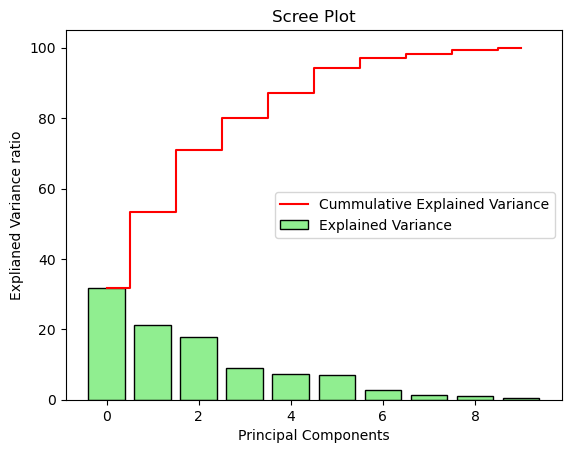

In [43]:
## Scree plot.
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)

In [44]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 6)
pca = PCA(n_components=6)

pca_df = pd.DataFrame(pca.fit_transform(df),columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.209147,-0.136805,0.009316,0.296315,-0.068526,0.108967
1,-0.225489,0.147154,-0.476180,-0.078767,0.001665,0.153077
2,-0.217418,0.014360,-0.025048,0.314553,-0.124471,-0.012801
3,-0.184774,0.275854,-0.165377,-0.117155,0.147467,-0.098736
4,-0.201767,-0.316319,0.318231,-0.046656,-0.094244,-0.013969


In [45]:
## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [46]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

#### a. Find the optimal K Value using elbow plot for K Means clustering.

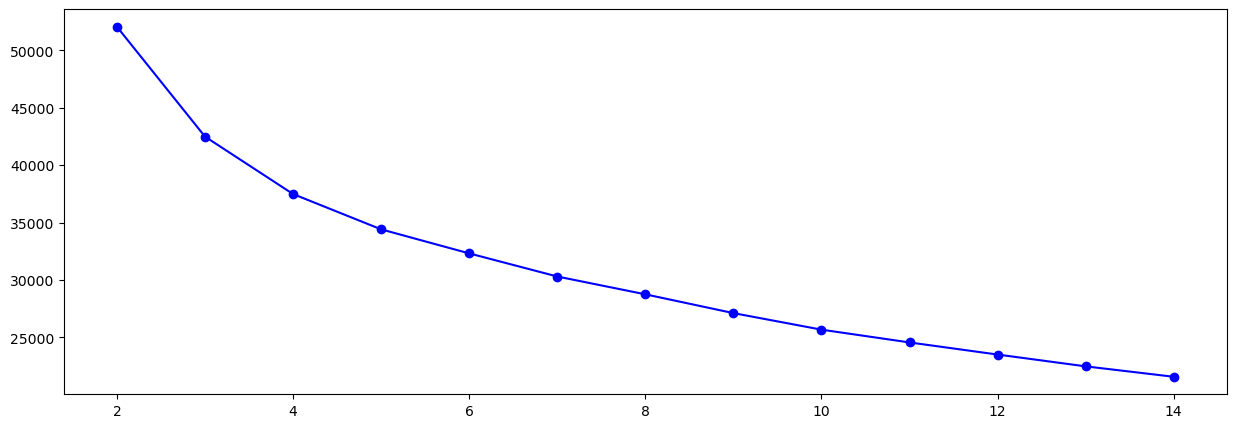

In [47]:
## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

#### b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [48]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [49]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [50]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Label
0,-0.209147,-0.136805,0.009316,0.296315,-0.068526,0.108967,1
1,-0.225489,0.147154,-0.476180,-0.078767,0.001665,0.153077,0
2,-0.217418,0.014360,-0.025048,0.314553,-0.124471,-0.012801,1
3,-0.184774,0.275854,-0.165377,-0.117155,0.147467,-0.098736,0
4,-0.201767,-0.316319,0.318231,-0.046656,-0.094244,-0.013969,1


In [51]:
kmeans_df['Label'].value_counts()

Label
1    82766
0    65954
2    43824
Name: count, dtype: int64

#### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [52]:
## finding optimal clusters through silhoutte score
from sklearn.metrics import silhouette_score
for i in range(2,15):
    kmeans = KMeans(i,random_state=100)
    kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print(i,silhouette_score(pca_df,labels))

2 0.3372051609358672
3 0.24553543562637042
4 0.23935417828519456
5 0.22630810949037633
6 0.23079711214643397
7 0.20551059633494356
8 0.20481899582842483
9 0.22259501314226204
10 0.2181431062802145
11 0.21223736589869027
12 0.2237974797227281
13 0.21796703436431875
14 0.22500281312550552


### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) (8)

#### a. Find the optimal K Value using dendrogram for Agglomerative clustering.

In [53]:
## Taking a sample of 50K rows from the dfc2 dataframe using random sampling technique provided by pandas 

## Storing it in the new dataframe called 'dfc3' 
dfc3 = dfc2.sample(n=50000)

## reseting the index
dfc3.reset_index(inplace=True,drop=True)

In [54]:
dfc3.head(4)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0.0,0.352381,0.320,1.00,0.285714,0.666667,0.298507,0.500000,0.068966,0.188034
1,1.0,0.361905,0.380,1.00,0.285714,0.166667,0.298507,0.583333,0.275862,0.256410
2,0.0,0.352381,0.312,0.75,0.857143,0.500000,0.238806,0.375000,0.137931,0.247863
3,0.5,0.361905,0.320,0.75,0.714286,0.833333,0.656716,0.375000,0.137931,0.230769


#### b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.

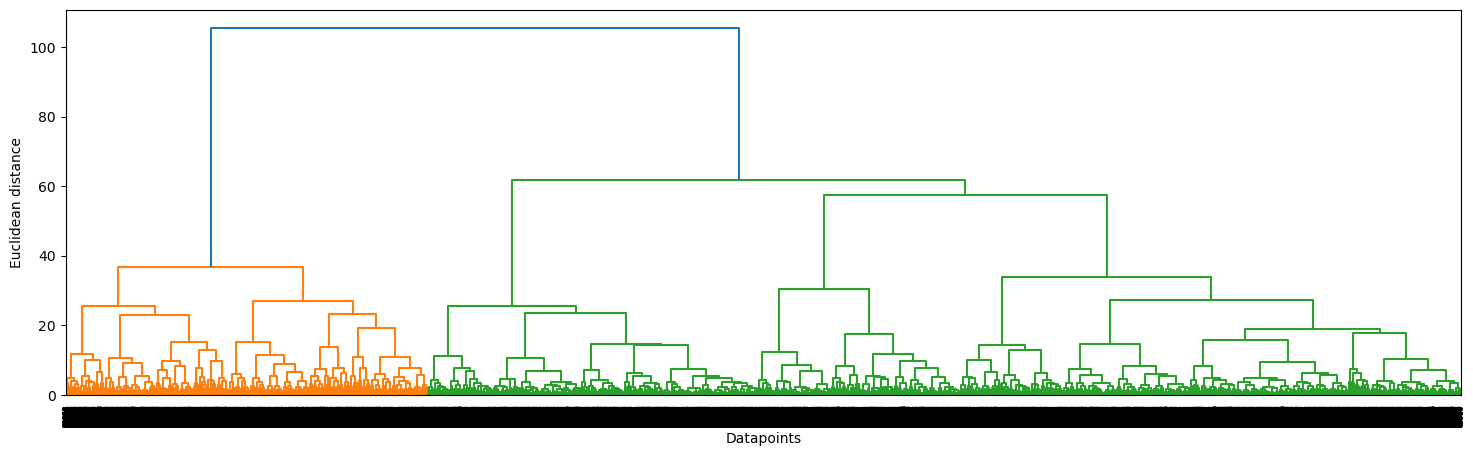

In [55]:
plt.figure(figsize=[18,5])
merg = linkage(dfc3, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [56]:
## Building hierarchical clustering model using the optimal clusters as 2
hie_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(dfc3)

In [58]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,1


In [59]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc1)

df_hier = dfc1.join(df_label1)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,0.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,1.0
2,fit,34b,130.0,10.0,party,hourglass,sheath,64.0,4,116.0,0.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,1.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,1.0


#### c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [60]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(dfc3)
    labels = hier.fit_predict(dfc3)
    print(i,silhouette_score(dfc3,labels))

2 0.3168672219404647
3 0.17889344857779768
4 0.19828714697788077
5 0.18575818971047392
6 0.17872272680647425
7 0.16365782258348674
8 0.14619637560489426
9 0.15276446286231984
10 0.15665745362546407
11 0.16003299439293966
12 0.14864816180500634
13 0.15419794855095673
14 0.1594927088567606


## ● Conclusion : [ Score: 2 point ]

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. (2)

In [61]:
df_hier.head(2)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,0.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,1.0


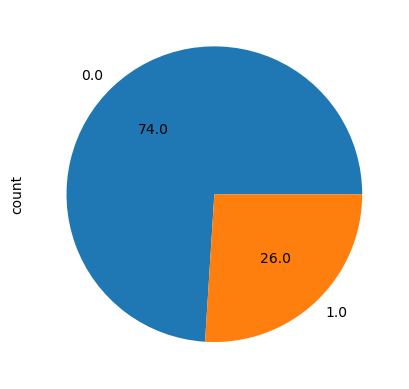

In [62]:
df_hier['Labels'].value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

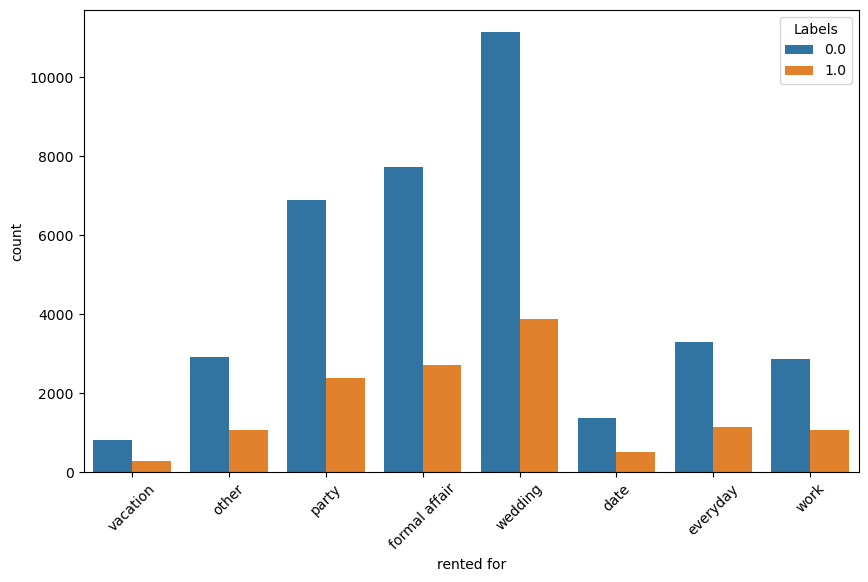

In [70]:
## Let us check the distribution of the different categories of 'rented for' column 
## w.r.t the clusters formed by agglomerative clustering technique.
plt.figure(figsize=(10, 6))
sns.countplot(x='rented for', hue='Labels', data=df_hier)
plt.xticks(rotation = 45)
plt.show()

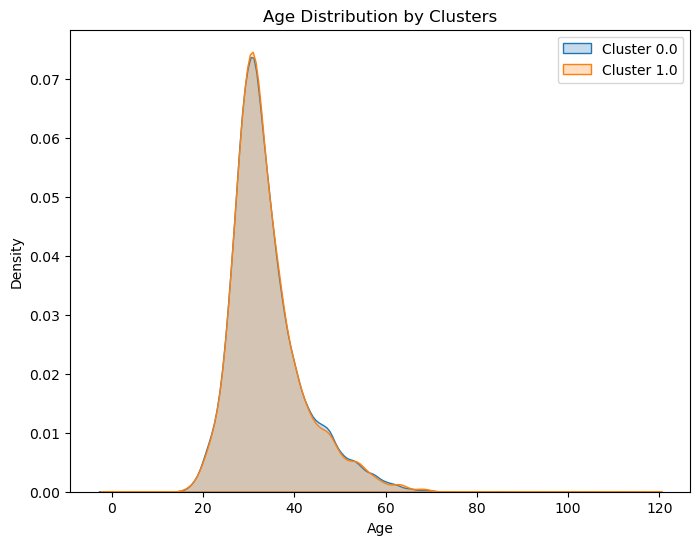

In [72]:
## Lets check the age distribution of the different clusters.
plt.figure(figsize=(8, 6))
for label in df_hier['Labels'].unique():
    sns.kdeplot(df_hier[df_hier['Labels'] == label]['age'], label=f'Cluster {label}', shade=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Clusters')
plt.show()

## Submission:

##### - Please submit the solution file in .html and .ipynb format on Olympus

##### - Add necessary comments wherever required.